In [1]:
import pandas as pd

df=pd.read_csv('Olympic_Athlete_Event_Results.csv',encoding='ISO-8859-1',on_bad_lines='skip')

print("First few rows of the dataset:")
display(df.head())

print("Dataset Information:")
df.info()

print("Missing Values Count:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

print("Statistical Summary for Numerical Colums:")
display(df.describe())

# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)
print("\nUnique Values in Each Column:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)
print("\nUnique Categories in Key Columns:")
print("Medal:", df['Medal'].unique())
print("Sport:", df['Sport'].unique())
print("Country:", df['Country'].unique())


<ipython-input-1-1fd6fac70555>:3: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Olympic_Athlete_Event_Results.csv',encoding='ISO-8859-1',on_bad_lines='skip')


First few rows of the dataset:


,Games,edition_id,NOC,Sport,Event,result_id,Name,athlete_id,pos,Medal,isTeamSport,Height,Weight,Born,Country,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1972 Summer Olympics,18,BEN,Athletics,"400 metres, Men",61050.0,Ibrahima Idrissou,65351,6 h7 r1/4,NaN,FALSE,NaN,NaN,01-01-1940,Benin,NaN,NaN,NaN,NaN
1,1972 Summer Olympics,18,BEN,Athletics,"Triple Jump, Men",61226.0,Christoph Chodaton,923484,DNS,NaN,FALSE,NaN,NaN,NaN,Benin,NaN,NaN,NaN,NaN
2,1972 Summer Olympics,18,BEN,Boxing,"Light-Flyweight, Men",24001.0,Meriga Salou Seriki,1692,17,NaN,FALSE,157,48,08-04-1953,Benin,NaN,NaN,NaN,NaN
3,1972 Summer Olympics,18,BEN,Boxing,"Bantamweight, Men",24081.0,Leopold Agbazo,1691,33,NaN,FALSE,159,54,25-01-1945,Benin,NaN,NaN,NaN,NaN
4,1972 Summer Olympics,18,BIZ,Shooting,"Free Pistol, 50 metres, Open",51723.0,Owen Phillips,41408,59,NaN,FALSE,175,76,09-07-2006,Belize,NaN,NaN,NaN,NaN


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213231 entries, 0 to 213230
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Games        212845 non-null  object 
 1   edition_id   213143 non-null  object 
 2   NOC          212794 non-null  object 
 3   Sport        211824 non-null  object 
 4   Event        213120 non-null  object 
 5   result_id    212952 non-null  float64
 6   Name         212971 non-null  object 
 7   athlete_id   211298 non-null  object 
 8   pos          204267 non-null  object 
 9   Medal        35908 non-null   object 
 10  isTeamSport  208593 non-null  object 
 11  Height       186134 non-null  object 
 12  Weight       186809 non-null  object 
 13  Born         208916 non-null  object 
 14  Country      200180 non-null  object 
 15  Unnamed: 15  230 non-null     object 
 16  Unnamed: 16  5 non-null       object 
 17  Unnamed: 17  3 non-null       object 
 18  Unn

,0
Games,386
edition_id,88
NOC,437
Sport,1407
Event,111
result_id,279
Name,260
athlete_id,1933
pos,8964
Medal,177323


Statistical Summary for Numerical Colums:


,result_id
count,2.129520e+05
mean,2.153281e+06
std,5.697547e+06
min,4.000000e+01
25%,2.969300e+04
50%,7.060500e+04
75%,3.223090e+05
max,9.001677e+07



Unique Values in Each Column:
Games: 413 unique values
edition_id: 798 unique values
NOC: 424 unique values
Sport: 75 unique values
Event: 532 unique values
Name: 103903 unique values
athlete_id: 101091 unique values
pos: 1537 unique values
Medal: 77 unique values
isTeamSport: 80 unique values
Height: 218 unique values
Weight: 3722 unique values
Born: 22899 unique values
Country: 306 unique values
Unnamed: 15: 28 unique values
Unnamed: 16: 4 unique values
Unnamed: 17: 2 unique values
Unnamed: 18: 1 unique values

Unique Categories in Key Columns:
Medal: [nan 'FALSE' 'TRUE' 'Silver' 'Bronze' 'Gold' '19' '47' '7' '2' '1' '4'
 '51722' '5' '32' '=66 r1/1' '=51 r1/1' '53 r1/1' '17' '16' '12' '6' '3'
 'DNF' '10' '8' '20' '11' 'AC' '29' '14' 'DQ' '7 h11 r1/4' '8 h8 r1/4'
 'Francisco Garcl62088' '25' '26' '23' '36' '22' '3 h2 r2/4' '58 r1/2' '9'
 'Fernando Lez62756' '13' '44' '35' '27' '50' '28' '34' '56' '7 h3 r1/4'
 '15 h2 r1/2' '38' '18' '7 h2 r1/4' 'DNS' '8 h4 r1/3' '33'
 'Armands B\x13rz

In [2]:
print(df.shape)

(213231, 19)


In [3]:
## As we can see that there are some misalignment in dataset
## the first task is to solve the misalignment problem by deleting those rows

## step 1: Drop rows where in column isTeamsport contain value other than true or false
# Drop rows where 'isTeamSport' is not exactly True or False
df_cleaned = df[df['isTeamSport'].isin(['TRUE','FALSE'])]
print(df_cleaned.shape)

print("Droping Unamed Columns .")
df_cleaned = df_cleaned.drop(columns=[col for col in df.columns if 'Unnamed' in col])

print(df_cleaned.shape)

## Droping rows with missing value of pos and country
df_cleaned = df_cleaned.dropna(subset=['pos', 'Country','Born'])

## Checking the missing values
print("Missing Values Count:")
missing_values = df_cleaned.isnull().sum()
print(missing_values)

# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)
print("\nUnique Values in Each Column:")
for column in df_cleaned.select_dtypes(include='object').columns:
    print(f"{column}: {df_cleaned[column].nunique()} unique values")
print(df_cleaned.shape)
# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)
print("\nUnique Categories in Key Columns:")
print("Medal:", df_cleaned['Medal'].unique())
print("Sport:", df_cleaned['Sport'].unique())
print("Country:", df_cleaned['Country'].unique())
print("Edition ID:", df_cleaned['edition_id'].unique())
print("Athlete ID:", df_cleaned['athlete_id'].unique())
print("Height:", df_cleaned['Height'].unique())
print("Weight:", df_cleaned['Weight'].unique())


(201809, 19)
Droping Unamed Columns .
(201809, 15)
Missing Values Count:
Games               0
edition_id          0
NOC                 0
Sport               0
Event               0
result_id           0
Name                0
athlete_id          0
pos                 0
Medal          171518
isTeamSport         0
Height          21504
Weight          21504
Born                0
Country             0
dtype: int64

Unique Values in Each Column:
Games: 27 unique values
edition_id: 27 unique values
NOC: 216 unique values
Sport: 70 unique values
Event: 490 unique values
Name: 98206 unique values
athlete_id: 98597 unique values
pos: 1374 unique values
Medal: 3 unique values
isTeamSport: 2 unique values
Height: 94 unique values
Weight: 505 unique values
Born: 22703 unique values
Country: 204 unique values
(199419, 15)

Unique Categories in Key Columns:
Medal: [nan 'Silver' 'Bronze' 'Gold']
Sport: ['Athletics' 'Boxing' 'Shooting' 'Weightlifting' 'Cycling Road'
 'Cycling Track' 'Wrestling' 'Swi

In [4]:
## As we can see there in some rows range of weight is given and the dtype of weight and height is object we will convert
## it into numerict value
def clean_and_convert(column):
    def convert_range(value):
        # Ensure the value is treated as a string
        value = str(value)
        if '-' in value:  # Check for a range
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        elif value.replace('.', '', 1).isdigit():  # Check if it’s a single numeric value
            return float(value)
        return None  # For values that cannot be converted

    # Apply the function and convert to numeric
    return pd.to_numeric(column.apply(convert_range), errors='coerce')

# Apply the function to 'Height' and 'Weight' columns
df_cleaned['Height'] = clean_and_convert(df_cleaned['Height'])
df_cleaned['Weight'] = clean_and_convert(df_cleaned['Weight'])

## Cheking unique value in weight and height
print("Height:", df_cleaned['Height'].unique())
print("Weight:", df_cleaned['Weight'].unique())

print("Dataset Information:")
df_cleaned.info()

Height: [ nan 157. 159. 175. 181. 167. 155. 168. 185. 170. 173. 166. 147. 160.
 165. 180. 171. 153. 183. 172. 163. 176. 184. 169. 177. 178. 182. 162.
 174. 158. 156. 195. 164. 150. 152. 139. 186. 161. 154. 179. 189. 187.
 191. 194. 190. 192. 193. 151. 188. 197. 196. 198. 204. 200. 201. 206.
 212. 213. 148. 130. 199. 132. 202. 145. 208. 203. 210. 216. 207. 205.
 209. 149. 223. 143. 136. 146. 218. 137. 142. 220. 140. 144. 141. 135.
 214. 138. 211. 217. 127. 128. 221. 215. 226. 219. 133.]
Weight: [  nan  48.   54.   76.   80.   61.   55.   68.   73.   75.   85.   84.
  56.   63.   52.   87.   67.   57.   65.   74.   70.   64.   58.   71.
  59.   60.   77.   95.   62.   86.   78.   81.   69.   72.   90.   88.
  53.   83.   51.   46.   50.   66.   44.   79.   47.   82.  116.  104.
 118.  105.  120.  112.   92.   93.   49.  103.   91.   94.   89.  108.5
 146.5 106.  100.  110.  125.   97.  113.   42.   98.   45.  109.   99.
 121.  140.   96.  114.  126.  123.  161.  128.  107.   63.5 108.  1

In [5]:
# Missing Data Handling.
missing_data_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
print("Missing Data Percentage in each Column:\n", missing_data_percentage)

Missing Data Percentage in each Column:
 Games           0.000000
edition_id      0.000000
NOC             0.000000
Sport           0.000000
Event           0.000000
result_id       0.000000
Name            0.000000
athlete_id      0.000000
pos             0.000000
Medal          80.437647
isTeamSport     0.000000
Height         10.084838
Weight         10.103597
Born            0.000000
Country         0.000000
dtype: float64


In [6]:
## Cleaning the data and handling missing values

## replacing the nan value in height and weight with median according to there sports
# Group by 'Sport' and calculate the median height for each sport
median_height_by_sport = df_cleaned.groupby('Sport')['Height'].transform('median')

# Replace NaN values in 'Height' with the median height of their respective sport
df_cleaned['Height'].fillna(median_height_by_sport)

# Group by 'Sport' and calculate the median weight for each sport
median_weight_by_sport = df_cleaned.groupby('Sport')['Weight'].transform('median')

# Replace NaN values in 'Weight' with the median weight of their respective sport
df_cleaned['Weight'].fillna(median_weight_by_sport)

## Replacing the nan value in medal with no Medal
df_cleaned['Medal'] = df_cleaned['Medal'].fillna('No Medal')

## Checking nan value
print(df_cleaned.isnull().sum())


Games              0
edition_id         0
NOC                0
Sport              0
Event              0
result_id          0
Name               0
athlete_id         0
pos                0
Medal              0
isTeamSport        0
Height         21504
Weight         21544
Born               0
Country            0
dtype: int64


In [7]:
df_cleaned=df_cleaned.dropna(subset=['Height','Weight'])
print(df_cleaned.isnull().sum())
print(df_cleaned.shape)

# Save the cleaned DataFrame
df_cleaned.to_csv('Cleaned_Olympic_Athlete_Event_Results.csv', index=False)


Games          0
edition_id     0
NOC            0
Sport          0
Event          0
result_id      0
Name           0
athlete_id     0
pos            0
Medal          0
isTeamSport    0
Height         0
Weight         0
Born           0
Country        0
dtype: int64
(177875, 15)


In [8]:
## addig new column in dataframe
## Adding age of an athelete and and bmi from height and weight

## Age
# Step 1: Extract the Olympic year
df_cleaned['Olympic_Year'] = df_cleaned['Games'].str.extract(r'(\d{4})')[0].astype(float)

# Step 2: Clean and convert the 'Born' column to datetime
df_cleaned['Born'] = pd.to_datetime(df_cleaned['Born'], format='%d-%m-%Y', errors='coerce')

# Step 3: Extract the birth year
df_cleaned['Birth_Year'] = df_cleaned['Born'].dt.year.astype(float)

# Step 4: Calculate age by subtracting birth year from Olympic year
df_cleaned['Age'] = df_cleaned['Olympic_Year'] - df_cleaned['Birth_Year']

# Step 5: Calculating BMI
df_cleaned['BMI'] = df_cleaned['Weight'] / ((df_cleaned['Height']/100) ** 2)

# Step 6: Remove rows with negative ages
df_cleaned = df_cleaned[df_cleaned['Age'] >= 0]

print(df_cleaned.head)


<bound method NDFrame.head of                        Games edition_id  NOC      Sport  \
2       1972 Summer Olympics         18  BEN     Boxing   
3       1972 Summer Olympics         18  BEN     Boxing   
12      1972 Summer Olympics         18  BAR  Athletics   
13      1972 Summer Olympics         18  BAR  Athletics   
17      1972 Summer Olympics         18  BAR  Athletics   
...                      ...        ...  ...        ...   
213222  2022 Winter Olympics         62  ROU  Bobsleigh   
213223  2022 Winter Olympics         62  GER  Bobsleigh   
213224  2022 Winter Olympics         62  AUT  Bobsleigh   
213228  2022 Winter Olympics         62  KOR  Bobsleigh   
213229  2022 Winter Olympics         62  JAM  Bobsleigh   

                             Event   result_id                        Name  \
2             Light-Flyweight, Men     24001.0         Meriga Salou Seriki   
3                Bantamweight, Men     24081.0              Leopold Agbazo   
12                  Decathl

In [9]:
## Scaling the columns like age,height,weight,and bmi

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features and create new columns for scaled values
df_cleaned[['Scaled_Height', 'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age']] = scaler.fit_transform(
    df_cleaned[['Height', 'Weight', 'BMI', 'Age']]
)

# Display to confirm new columns are created
print(df_cleaned[['Height','Scaled_Height', 'Weight','Scaled_Weight' ,'BMI','Scaled_BMI','Age', 'Scaled_Age']].head())

df_cleaned.to_csv('Scaled_Olympic_Athlete_Event_Results.csv', index=False)
df_scaled=pd.read_csv('Scaled_Olympic_Athlete_Event_Results.csv')

    Height  Scaled_Height  Weight  Scaled_Weight        BMI  Scaled_BMI   Age  \
2    157.0      -1.739702    48.0      -1.552801  19.473407   -1.100296  19.0   
3    159.0      -1.553049    54.0      -1.144047  21.359915   -0.464230  27.0   
12   181.0       0.500142    80.0       0.627221  24.419279    0.567282  28.0   
13   167.0      -0.806434    61.0      -0.667167  21.872423   -0.291430  22.0   
17   155.0      -1.926356    55.0      -1.075921  22.892820    0.052613  20.0   

    Scaled_Age  
2    -1.244627  
3     0.238887  
12    0.424326  
13   -0.688309  
17   -1.059188  


<ipython-input-9-697c6e1e9a05>:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scaled=pd.read_csv('Scaled_Olympic_Athlete_Event_Results.csv')


In [10]:
print("Medal" in df_scaled.columns)

print(df_scaled['Medal'].unique())

True
['No Medal' 'Silver' 'Bronze' 'Gold']


In [11]:
# Map the 'Medal' column: 1 for "Gold", "Silver", "Bronze" and 0 for "No Medal"
df_scaled['Medal_Indicator'] = df_scaled['Medal'].apply(lambda x: 0 if x == "No Medal" else 1)


In [12]:
print(df_scaled.columns)

Index(['Games', 'edition_id', 'NOC', 'Sport', 'Event', 'result_id', 'Name',
       'athlete_id', 'pos', 'Medal', 'isTeamSport', 'Height', 'Weight', 'Born',
       'Country', 'Olympic_Year', 'Birth_Year', 'Age', 'BMI', 'Scaled_Height',
       'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age', 'Medal_Indicator'],
      dtype='object')


In [13]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177668 entries, 0 to 177667
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Games            177668 non-null  object 
 1   edition_id       177668 non-null  int64  
 2   NOC              177668 non-null  object 
 3   Sport            177668 non-null  object 
 4   Event            177668 non-null  object 
 5   result_id        177668 non-null  float64
 6   Name             177668 non-null  object 
 7   athlete_id       177668 non-null  object 
 8   pos              177668 non-null  object 
 9   Medal            177668 non-null  object 
 10  isTeamSport      177668 non-null  bool   
 11  Height           177668 non-null  float64
 12  Weight           177668 non-null  float64
 13  Born             177668 non-null  object 
 14  Country          177668 non-null  object 
 15  Olympic_Year     177668 non-null  float64
 16  Birth_Year       177668 non-null  floa

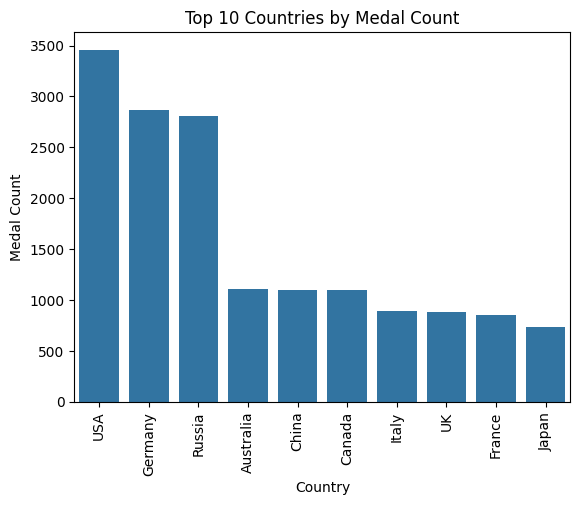

In [14]:
## EDA
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df_scaled[df_scaled['Medal'] != 'No Medal']['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()


<ipython-input-15-ed8f79c657b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.index, y=top_sports.values, palette='plasma')


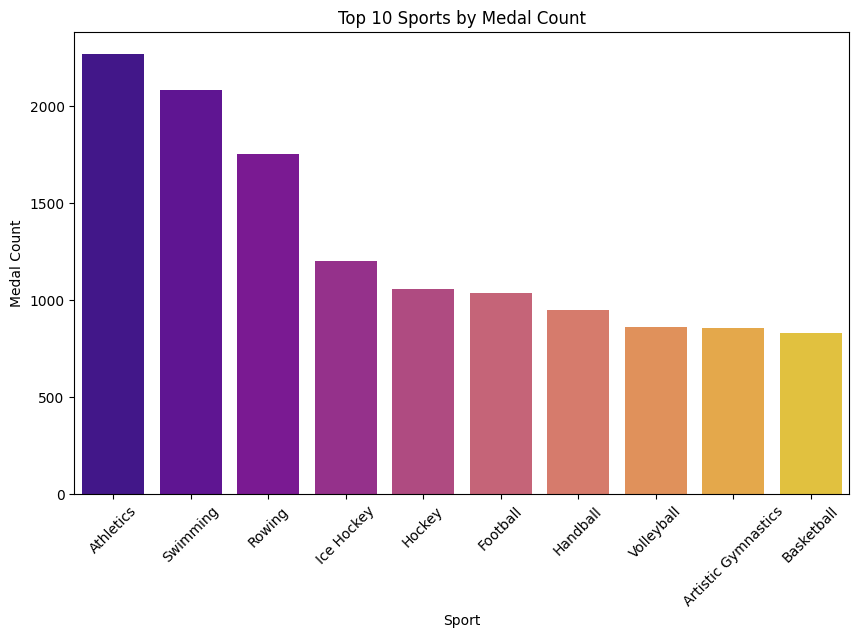

In [15]:
# Medal distribution by sport (Top 10 sports by medal count)
plt.figure(figsize=(10, 6))
top_sports = df_scaled[df_scaled['Medal'] != 'No Medal']['Sport'].value_counts().head(10)
sns.barplot(x=top_sports.index, y=top_sports.values, palette='plasma')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()

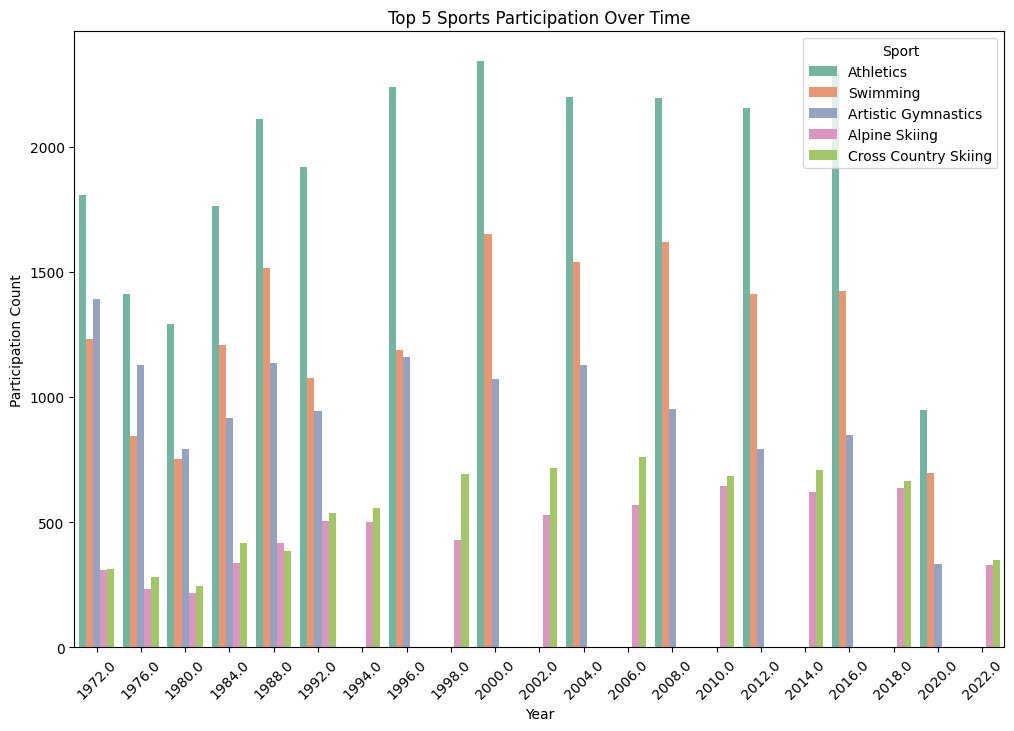

In [16]:
# Participation by sport over time (Top 5 sports with most participation)
top_sports_participation = df['Sport'].value_counts().head(5).index
df_top_sports = df_scaled[df_scaled['Sport'].isin(top_sports_participation)]
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_sports, x='Olympic_Year', hue='Sport', palette='Set2')
plt.title('Top 5 Sports Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Participation Count')
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.show()

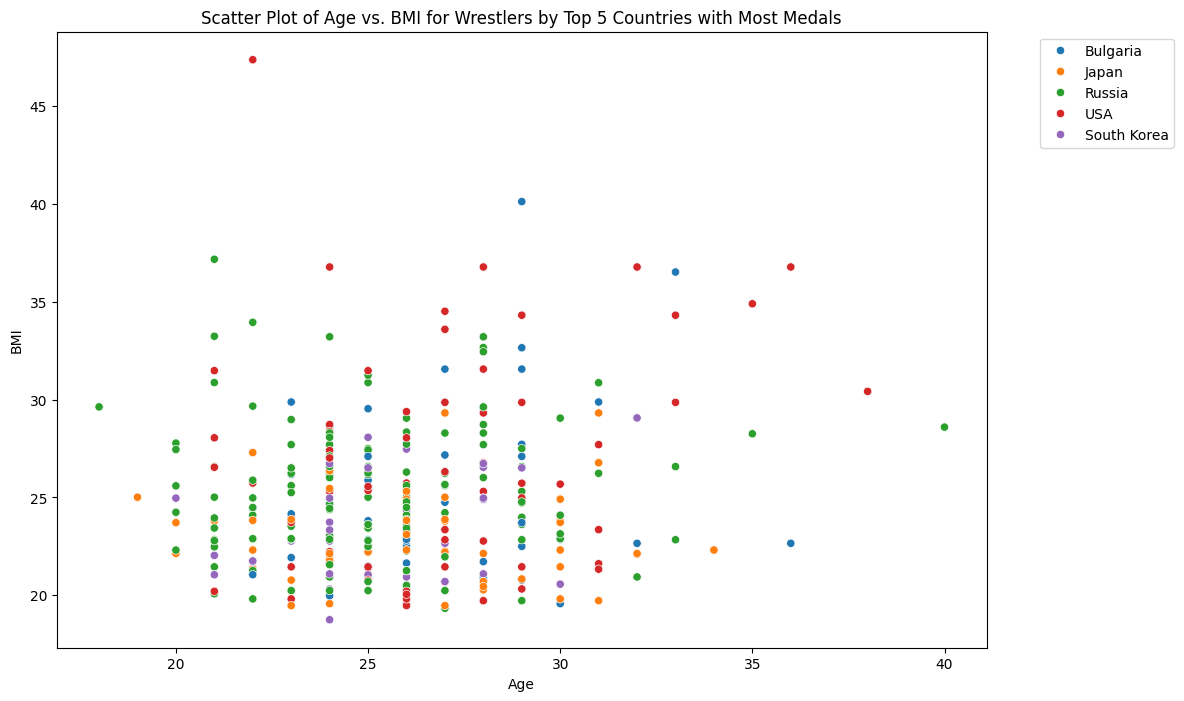

In [17]:
# This graph is to plot Age vs Bmi for wrestler for top 5 countries

# Step 1: Filter data for wrestling and where a medal was won
wrestling_medal_data = df_scaled[(df_scaled['Sport'] == 'Wrestling') & (df_scaled['Medal'] != 'No Medal')]

# Step 2: Get the top 5 countries in wrestling based on the number of medals won
top_5_wrestling_countries = wrestling_medal_data['Country'].value_counts().nlargest(5).index

# Step 3: Filter the original wrestling data to only include these top 5 countries
top_5_wrestling_data = wrestling_medal_data[wrestling_medal_data['Country'].isin(top_5_wrestling_countries)]

# Step 4: Plot Age vs. BMI for wrestlers from the top 5 countries
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_5_wrestling_data, x='Age', y='BMI', hue='Country', palette='tab10')
plt.title('Scatter Plot of Age vs. BMI for Wrestlers by Top 5 Countries with Most Medals')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## WE can do more Data Visualization Tecnique but there are many countries and many sports so it is not possible to show all tecnique

In [22]:
import numpy as np

# Group the data by sport and perform separate analysis for each sport
for sport in df_scaled['Sport'].unique():
    df_sport = df_scaled[df_scaled['Sport'] == sport]
    if df_sport.shape[0] > 0:  # Check if the sport group has enough data
        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable
        # Include the 'Country' column here
        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]
        # One hot encode the country column
        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
        y = df_sport['Medal_Indicator']

        # Check if there are at least two classes in the target variable before applying SMOTE
        if len(np.unique(y)) > 1:
            # Handle class imbalance using SMOTE with adjusted k_neighbors
            # If the minority class has fewer than 6 samples, use k_neighbors=minority_class_size - 1
            minority_class_size = np.min(np.bincount(y))
            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

            # Train a logistic regression model
            model = LogisticRegression()
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Sport: {sport}")
            print(f"Accuracy: {accuracy}")
            print(classification_report(y_test, y_pred))
        else:
            print(f"Sport: {sport} - Skipping SMOTE due to only one class in target variable.")

Sport: Boxing
Accuracy: 0.7544453852667231
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       598
           1       0.70      0.87      0.78       583

    accuracy                           0.75      1181
   macro avg       0.77      0.76      0.75      1181
weighted avg       0.77      0.75      0.75      1181



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sport: Athletics
Accuracy: 0.7442275515895148
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      4532
           1       0.73      0.77      0.75      4433

    accuracy                           0.74      8965
   macro avg       0.74      0.74      0.74      8965
weighted avg       0.75      0.74      0.74      8965

Sport: Cycling Road
Accuracy: 0.7852916314454776
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       604
           1       0.74      0.87      0.80       579

    accuracy                           0.79      1183
   macro avg       0.79      0.79      0.78      1183
weighted avg       0.79      0.79      0.78      1183

Sport: Cycling Track
Accuracy: 0.7303506650544136
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       432
           1       0.69      0.80      0.74       395

    accuracy                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [23]:
# prompt: Can you correctly implement Random forrest model for above code

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# Group the data by sport and perform separate analysis for each sport
for sport in df_scaled['Sport'].unique():
    df_sport = df_scaled[df_scaled['Sport'] == sport]
    if df_sport.shape[0] > 0:  # Check if the sport group has enough data
        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable
        # Include the 'Country' column here
        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]
        # One hot encode the country column
        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
        y = df_sport['Medal_Indicator']

        # Check if there are at least two classes in the target variable before applying SMOTE
        if len(np.unique(y)) > 1:
            # Handle class imbalance using SMOTE with adjusted k_neighbors
            # If the minority class has fewer than 6 samples, use k_neighbors=minority_class_size - 1
            minority_class_size = np.min(np.bincount(y))
            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42
            )

            # Train a Random Forest model
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Sport: {sport}")
            print(f"Accuracy: {accuracy}")
            print(classification_report(y_test, y_pred))
        else:
            print(
                f"Sport: {sport} - Skipping SMOTE due to only one class in target variable."
            )

Sport: Boxing
Accuracy: 0.8475867908552075
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       598
           1       0.84      0.85      0.85       583

    accuracy                           0.85      1181
   macro avg       0.85      0.85      0.85      1181
weighted avg       0.85      0.85      0.85      1181

Sport: Athletics
Accuracy: 0.8823201338538762
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4532
           1       0.88      0.88      0.88      4433

    accuracy                           0.88      8965
   macro avg       0.88      0.88      0.88      8965
weighted avg       0.88      0.88      0.88      8965

Sport: Cycling Road
Accuracy: 0.9256128486897718
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       604
           1       0.91      0.94      0.93       579

    accuracy                           0.93 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Sport: Skateboarding
Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Sport: Surfing
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Sport: Karate - Skipping SMOTE due to only one class in target variable.
Sport: Cycling BMX Freestyle - Skipping SMOTE due to only one class in target variable.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# prompt: find MSE and MAE values for training and testing and also confusion matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.linear_model import LogisticRegression


# Group the data by sport and perform separate analysis for each sport
for sport in df_scaled['Sport'].unique():
    df_sport = df_scaled[df_scaled['Sport'] == sport]
    if df_sport.shape[0] > 0:  # Check if the sport group has enough data
        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable
        # Include the 'Country' column here
        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]
        # One hot encode the country column
        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
        y = df_sport['Medal_Indicator']

        # Check if there are at least two classes in the target variable before applying SMOTE
        if len(np.unique(y)) > 1:
            # Handle class imbalance using SMOTE with adjusted k_neighbors
            # If the minority class has fewer than 6 samples, use k_neighbors=minority_class_size - 1
            minority_class_size = np.min(np.bincount(y))
            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42
            )

            # Train a Random Forest model
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calculate MSE and MAE for training and testing sets
            mse_train = mean_squared_error(y_train, y_train_pred)
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)

            # Calculate the confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)


            print(f"Sport: {sport}")
            print(f"Training MSE: {mse_train:.4f}")
            print(f"Training MAE: {mae_train:.4f}")
            print(f"Testing MSE: {mse_test:.4f}")
            print(f"Testing MAE: {mae_test:.4f}")
            print("Confusion Matrix:\n", cm)

        else:
            print(
                f"Sport: {sport} - Skipping SMOTE due to only one class in target variable."
            )

Sport: Boxing
Training MSE: 0.0013
Training MAE: 0.0013
Testing MSE: 0.1524
Testing MAE: 0.1524
Confusion Matrix:
 [[506  92]
 [ 88 495]]
Sport: Athletics
Training MSE: 0.0129
Training MAE: 0.0129
Testing MSE: 0.1177
Testing MAE: 0.1177
Confusion Matrix:
 [[4016  516]
 [ 539 3894]]
Sport: Cycling Road
Training MSE: 0.0091
Training MAE: 0.0091
Testing MSE: 0.0744
Testing MAE: 0.0744
Confusion Matrix:
 [[551  53]
 [ 35 544]]
Sport: Cycling Track
Training MSE: 0.0287
Training MAE: 0.0287
Testing MSE: 0.1717
Testing MAE: 0.1717
Confusion Matrix:
 [[351  81]
 [ 61 334]]
Sport: Shooting
Training MSE: 0.0111
Training MAE: 0.0111
Testing MSE: 0.0987
Testing MAE: 0.0987
Confusion Matrix:
 [[963 112]
 [101 982]]
Sport: Weightlifting
Training MSE: 0.0003
Training MAE: 0.0003
Testing MSE: 0.1318
Testing MAE: 0.1318
Confusion Matrix:
 [[354  57]
 [ 47 331]]
Sport: Wrestling
Training MSE: 0.0023
Training MAE: 0.0023
Testing MSE: 0.1650
Testing MAE: 0.1650
Confusion Matrix:
 [[557 114]
 [103 541]]
Sp

In [29]:
# prompt: take hard code input and get the output for above random forrest model

# Example hardcoded input for a specific sport (e.g., Wrestling)
sport = 'Boxing'
scaled_bmi = 0.205077  # Example scaled BMI
scaled_age = -0.49925  # Example scaled age
country = 'Colombia'  # Example country

# Find the sport-specific DataFrame
df_sport = df_scaled[df_scaled['Sport'] == sport]

if df_sport.shape[0] > 0:
    # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country)
    X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]

    # One hot encode the country column
    X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
    y = df_sport['Medal_Indicator'] # Define target variable 'y'

    # Make sure the input columns match the training data
    input_data = pd.DataFrame({'Scaled_BMI': [scaled_bmi], 'Scaled_Age': [scaled_age]})
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Ensure the order of columns is the same as during training
    input_data = input_data[X.columns]

    # Train the Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y) # Fit the model to your data before making predictions

    # Make a prediction using the hardcoded input
    prediction = model.predict(input_data)

    # Print the prediction (0 for 'No Medal', 1 for 'Medal')
    print(f"Prediction for {sport} with BMI {scaled_bmi} and age {scaled_age} from {country}: {prediction[0]}")

else:
    print(f"No data found for the sport: {sport}")

<ipython-input-29-a50047869f8a>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
<ipython-input-29-a50047869f8a>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
<ipython-input-29-a50047869f8a>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col]

Prediction for Boxing with BMI 0.205077 and age -0.49925 from Colombia: 0
